In [174]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
import scipy.sparse as sp

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/artem/Desktop/programming/Shad_ML/Data/lab3/default of credit card clients.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data = data.drop(['ID'], axis=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape
(30000 / 5)*4

24000.0

In [5]:
x_train = data.iloc[:24000, :].drop(['default payment next month'], axis=1)
y_train = data['default payment next month'][:24000]

In [6]:
x_test = data.iloc[24001:, :].drop(['default payment next month'], axis=1)
y_test = data['default payment next month'][24001:] # just in case

In [7]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.126775,0.769235,0.195622,-1.067388,-1.227552,1.783088,1.768766,-0.702030,-0.675796,-1.536614,...,-0.669840,-0.671771,-0.662880,-0.651915,-0.367853,-0.246499,-0.308741,-0.318719,-0.313259,-0.294350
1,-0.352338,0.769235,0.195622,0.848068,-1.011822,-0.887372,1.768766,0.128529,0.181451,0.222448,...,-0.640614,-0.619892,-0.605625,-0.596788,-0.367853,-0.231544,-0.246611,-0.251528,-0.313259,-0.180907
2,-0.584669,0.769235,0.195622,0.848068,-0.148903,0.002782,0.102869,0.128529,0.181451,0.222448,...,-0.481110,-0.444545,-0.415166,-0.389061,-0.267112,-0.207502,-0.246611,-0.251528,-0.247771,-0.010743
3,-0.894444,0.769235,0.195622,-1.067388,0.174692,0.002782,0.102869,0.128529,0.181451,0.222448,...,0.042878,-0.222837,-0.182980,-0.152426,-0.235124,-0.182546,-0.234185,-0.244809,-0.243252,-0.237629
4,-0.894444,-1.299992,0.195622,-1.067388,2.331990,-0.887372,0.102869,-0.702030,0.181451,0.222448,...,-0.154446,-0.339756,-0.345598,-0.328508,-0.235124,1.484169,0.312560,0.286000,-0.268138,-0.255837


In [8]:
scaler = StandardScaler()
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.875377,-1.011569,0.149404,0.901654,-1.102200,0.063506,0.148171,0.181734,0.217763,0.286101,...,0.106025,0.128815,-0.233362,-0.184261,-0.179589,-0.132267,-0.185656,-0.170958,-0.121723,-0.228857
1,1.702414,-1.011569,0.149404,0.901654,-0.990954,0.063506,0.148171,0.181734,0.217763,0.286101,...,-0.517056,-0.522839,-0.332799,-0.500115,-0.169414,0.120516,-0.212690,-0.219424,-0.284352,-0.237628
2,-1.178646,-1.011569,3.763417,0.901654,-0.990954,4.514116,3.531152,2.753007,1.914339,2.077669,...,-0.395413,-0.393003,-0.342773,-0.331650,-0.285616,-0.208711,-0.276165,-0.230525,-0.317662,-0.289875
3,-0.951194,-1.011569,1.354075,0.901654,-0.990954,0.063506,0.148171,-1.532449,-1.478812,-0.609682,...,-0.672603,-0.678470,-0.663142,-0.654344,-0.285616,-0.205422,-0.276165,-0.275472,-0.304600,-0.284427
4,-0.496290,-1.011569,0.149404,0.901654,-0.990954,0.063506,0.148171,0.181734,0.217763,0.286101,...,0.752526,0.873703,1.029860,1.121079,-0.030074,-0.011352,-0.011132,-0.062654,0.008903,-0.071952


In [9]:
best_params = []
best_score = []

for num in range(2, 7):
    svc = SVC(kernel='linear')
    clf = GridSearchCV(svc, n_jobs=-1, param_grid={'C': np.logspace(-5, 2, num=num), 'max_iter': np.logspace(3, 4, num=num)}, scoring='roc_auc')
    t = time.time()
    clf.fit(x_train, y_train)
    print("num: ", num)
    print("time: ", time.time() - t)
    best_params.append(clf.best_params_)
    best_score.append(clf.best_score_)
    

KeyboardInterrupt: 

In [99]:
a = np.logspace(3, 4, num=8)

[1000, 1389, 1930, 2682, 3727, 5179, 7196, 10000]

In [124]:
best_params_randomized = []
best_score_randomized = []

for n in range(2, 7):
    num = 6
    svc = SVC(kernel='linear')
    clf = RandomizedSearchCV(svc, n_iter= n ** 2, n_jobs=-1, param_distributions={'C': np.logspace(-5, 2, num=num), 'max_iter': list(map(int, np.logspace(3, 4, num=num)))}, scoring='roc_auc')
    t = time.time()
    clf.fit(x_train, y_train)
    print("n: ", n)
    print("time: ", time.time() - t)
    best_params_randomized.append(clf.best_params_)
    best_score_randomized.append(clf.best_score_)


/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=6309).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


n:  2
time:  36.55054211616516


/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


n:  3
time:  64.44296765327454


/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


n:  4
time:  125.90017676353455


/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


n:  5
time:  169.223313331604
n:  6
time:  271.0389037132263


/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [126]:
best_params

[{'C': 1e-05, 'max_iter': 10000.0},
 {'C': 0.03162277660168379, 'max_iter': 10000.0},
 {'C': 0.0021544346900318843, 'max_iter': 4641.588833612777},
 {'C': 0.03162277660168379, 'max_iter': 5623.413251903491},
 {'C': 0.00630957344480193, 'max_iter': 1584.893192461114}]

In [127]:
best_params_randomized

[{'max_iter': 6309, 'C': 0.00025118864315095795},
 {'max_iter': 1584, 'C': 0.00025118864315095795},
 {'max_iter': 1584, 'C': 0.00630957344480193},
 {'max_iter': 1584, 'C': 0.00630957344480193},
 {'max_iter': 1584, 'C': 0.00630957344480193}]

In [134]:
best_score_randomized

[0.6964761937604893,
 0.7115319047490531,
 0.7155363788207282,
 0.7155363788207282,
 0.7155363788207282]

In [131]:
best_score_max_iter_fixed = []
for i in range(len(best_params)):
    clf = SVC(kernel='linear', C=best_params[i]['C'], max_iter=10000)
    scores = cross_validate(clf, x_train, y_train, n_jobs=-1, scoring='roc_auc')
    best_score_max_iter_fixed.append(sum(scores['test_score']) / 5)

In [136]:
best_score_C_fixed = []
for i in range(len(best_params)):
    clf = SVC(kernel='linear', C=1, max_iter=best_params[i]['max_iter'])
    scores = cross_validate(clf, x_train, y_train, n_jobs=-1, scoring='roc_auc')
    best_score_C_fixed.append(sum(scores['test_score']) / 5)

Text(0, 0.5, 'best_score')

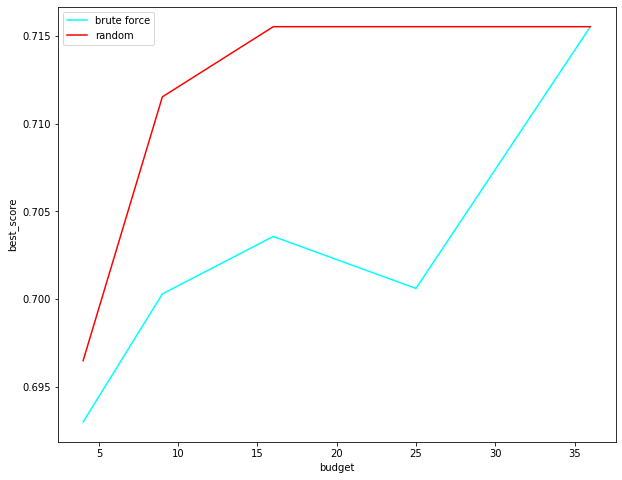

In [138]:
plt.figure(figsize=(10, 8))
line_brute_force, = plt.plot([i**2 for i in range(2, 7)], best_score, color='cyan')
line_random, = plt.plot([i**2 for i in range(2, 7)], best_score_randomized, color='red')
plt.legend([line_brute_force, line_random], ['brute force', 'random'])
plt.xlabel('budget')
plt.ylabel('best_score')

На этом графике изображено две кривые:
* красная кривая: кривая best_scorов при рандомном выборе гиперпараметров при фиксированном budget
* голубая кривая: кривая best_scorов при полном переборе по сетке

Text(0, 0.5, 'best_score')

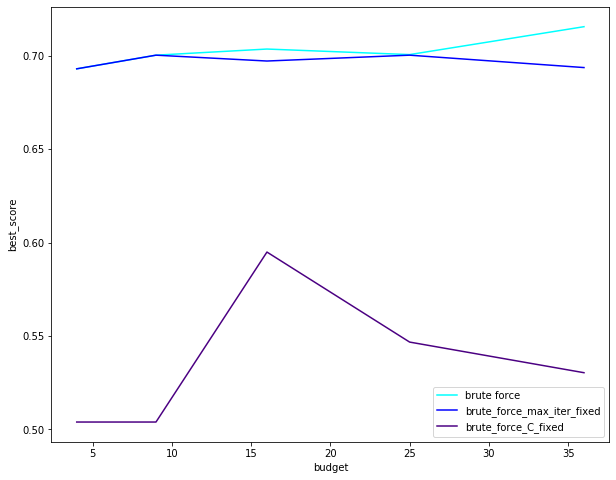

In [139]:
plt.figure(figsize=(10, 8))
line_brute_force, = plt.plot([i**2 for i in range(2, 7)], best_score, color='cyan')
line_brute_force_max_iter_fixed, = plt.plot([i**2 for i in range(2, 7)], best_score_max_iter_fixed, color='blue')
line_brute_force_C_fixed, = plt.plot([i**2 for i in range(2, 7)], best_score_C_fixed, color='indigo')
plt.legend([line_brute_force, line_brute_force_max_iter_fixed, line_brute_force_C_fixed], ['brute force', 'brute_force_max_iter_fixed', 'brute_force_C_fixed'])
plt.xlabel('budget')
plt.ylabel('best_score')

На этом графике изображено три кривые:
* Голубая: кривая best_score при полном переборе по сетке с заданным budget
* Синяя: кривая scorов при параметре C таком же как у голубой кривой, а max_iter=10000
* Цвета индиго: кривая scorов при параметре С=1, а параметр max_iter такой же как у голубой кривой.

Этот график показывает, что оба параметра C и max_iter важны, при большом max_iter может случиться переобучение, из-за чего качество пострадает. Параметр C очень важен, так как от него зависит ширина разделяющей полосы в алгоритме SVM, то есть количество опорных обьектов с помощью которых мы будем давать ответы. 
Видно также, что в то время как при неаккуратном подборе параметра max_iter мы не сильно теряем в точности, в то время как значение С очень сильно влияет на качество классификация. То есть параметр C важнее.

##### Ответ:
* Лучший score равен 0.715, достигается при параметрах 'max_iter': 1584, 'C': 0.00630957344480193. С важнее и второй график это иллюстрирует.(см. комментарий к графику)
* Случайный поиск выигрывает при правильном подборе интервалов. В данном случае у нас на первой картинке видно, что красная кривая всегда лежит выше голубой. Однако, это не всегда так. Я убедился в этом когда выставлял параметры, как вы советовали. Мне видимо не подошел интервал (0.1, 1) для C, так как я нормализовал данные. В моем случае оптимальное С порядка 0.006. Если же выставить интервал, где оптимального С нет, то есть на этом интервале оптимальным будет один из концов, то нет никакой разнице, применять рандомный подбор или полный перебор. Ровно этот результат я и получил на том графике(которого однако здесь нигде нет), там красная и голубая кривая много раз пересекали друг друга.
* При удачном же подборе интервалов, когда оптимальное решение будет лежать где-то внутри паралеллепипеда рандомный перебор дает лучшие результаты внезависимоти от buget. В budget=36 кривые совпали лишь потому, что там рандом скатывается до полного перебора, так как я выбрал рандом по сетке 6x6 параметров.


In [115]:
best_C = 0.00630957344480193
best_max_iter = 1584

In [116]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [117]:
class SVC_prob(SVC):
    def decision_function(self, X):
        arr = super(SVC_prob, self).decision_function(X)
        for i in range(len(arr)):
            arr[i] = sigmoid(arr[i])
        return arr

In [118]:

prob_pos = {}

for s in ['sigmoid', 'isotonic']:
    svm = SVC_prob(kernel='linear', C=best_C, max_iter=best_max_iter)
    clf = CalibratedClassifierCV(svm, method=s)
    clf.fit(x_train, y_train)
    prob_pos[s] = clf.predict_proba(x_train)[:, 1]
    prob_pos[s + 'test'] = clf.predict_proba(x_test)[:, 1]

/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

In [119]:
x_train_model, x_train_cal, y_train_model, y_train_cal = train_test_split(x_train, y_train)

In [121]:
svm = SVC_prob(kernel='linear', C=best_C, max_iter=best_max_iter)
svm.fit(x_train_model, y_train_model)
clf = CalibratedClassifierCV(svm, method='isotonic', cv='prefit') 
clf.fit(x_train_cal, y_train_cal)
prob_pos['isotonic_without_cv'] = clf.predict_proba(x_train)[:, 1]
prob_pos['isotonic_without_cv_test'] = clf.predict_proba(x_test)[:, 1]

/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [122]:
svm = SVC_prob(kernel='linear', C=best_C, max_iter=best_max_iter)
svm.fit(x_train, y_train)
prob_pos['without'] = svm.decision_function(x_train)

/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [123]:
fraction_of_positives = {}
mean_predicted_value = {}

In [124]:
for s in ['sigmoid', 'isotonic', 'without', 'isotonic_without_cv']:
    fraction_of_positives[s], mean_predicted_value[s] = calibration_curve(y_train, prob_pos[s], n_bins=10)

([<matplotlib.axis.YTick at 0x7f62d2696c90>,
 <a list of 10 Text yticklabel objects>)

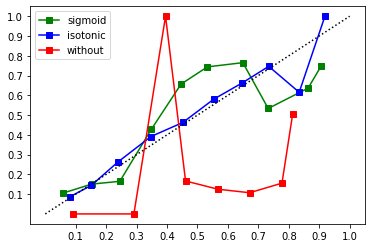

In [125]:
colors = ['green', 'blue', 'red']
k = 0
line = {}

for s in ['sigmoid', 'isotonic', 'without']:
    line[s],  = plt.plot(mean_predicted_value[s], fraction_of_positives[s], "s-", label=s, c=colors[k])
    k += 1
plt.legend((line['sigmoid'], line['isotonic'], line['without']), ('sigmoid', 'isotonic', 'without'))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xticks([i / 10 for i in range(1, 11)])
plt.yticks([i / 10 for i in range(1, 11)])


##### График проверяющий, влияет ли кросс-валидация в калибровке на качество

([<matplotlib.axis.YTick at 0x7f62d2631390>,
 <a list of 10 Text yticklabel objects>)

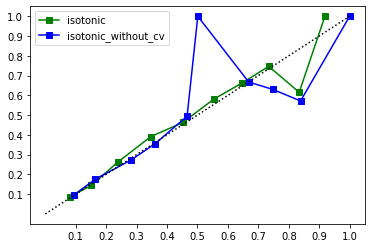

In [126]:
colors = ['green', 'blue']
k = 0
line = {}

for s in ['isotonic', 'isotonic_without_cv']:
    line[s],  = plt.plot(mean_predicted_value[s], fraction_of_positives[s], "s-", label=s, c=colors[k])
    k += 1
plt.legend((line['isotonic'], line['isotonic_without_cv']), ('isotonic', 'isotonic_without_cv'))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xticks([i / 10 for i in range(1, 11)])
plt.yticks([i / 10 for i in range(1, 11)])

##### Сравнение качества калибровки с cv и без cv

In [131]:
for s in ['isotonictest', 'isotonic_without_cv_test']:
    print(s + ": LogLoss = ", log_loss(y_test, prob_pos[s]))

isotonictest: LogLoss =  0.43420732731380335
isotonic_without_cv_test: LogLoss =  0.4618395248902578


#### Видно, что качество с cross-validation получается лучше

In [88]:
prob_pos_test = {}

for s in ['sigmoid', 'isotonic']:
    svm = SVC_prob(kernel='linear', C=best_C, max_iter=best_max_iter)
    clf = CalibratedClassifierCV(svm, method=s)
    clf.fit(x_train, y_train)
    prob_pos_test[s] = clf.predict_proba(x_test)[:, 1]

/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/artem/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1584).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ar

In [91]:
prob_pos_test['without'] = svm.decision_function(x_test)

In [92]:
for s in ['sigmoid', 'isotonic', 'without']:
    print(s + ": LogLoss = ", log_loss(y_test, prob_pos_test[s]))

sigmoid: LogLoss =  0.4620193756519521
isotonic: LogLoss =  0.43420732731380335
without: LogLoss =  1.2442399001352893


* Дает ли калибровка прирост качества относительно метрики logloss?
* Какой из способов калибровки в данном случае работает лучше?
* Какой из подходов (калибровка на отложенной выборке или по кросс-валидации) дает более хороший результат?
* Почему калибровка практически не должна повлиять на AUC-ROC?

##### Ответ
* Да калибровка дает существенный прирост качества, что видно и на графике и по logLoss
* лучше всего оказался isotonic, у него log_loss меньше всего и на графике на тренировочных данных он визуально самый хороший(на тренировочных данных log_loss не запускал)
* Как видно на графике выше по обучающей выборке и по log_loss на тестовой выборке калибровка без cross-validation работает хуже
* потому что ROC-AUC - это среднее число правильно упорядоченных пар обьектов (если мы упорядочим обьекты по decision_function), и это число не меняется, т.к. калибровка - это монотонная функция

## Работа с текстовыми данными

In [62]:
data_x = pd.read_csv("/home/artem/Desktop/programming/Shad_ML/Data/lab3/X_train.csv")
data_y = pd.read_csv("/home/artem/Desktop/programming/Shad_ML/Data/lab3/Y_train.csv")

In [63]:
data_x = data_x.iloc[:data_x.shape[0] // 10, :]
data_y = data_y.iloc[:data_y.shape[0] // 10, :]

##### Комментарий
у меня с таким большим datasetом проблемы даже не из за времени, а из за оперативной памяти, хоть я ее и стараюсь чистить по ходу программы
Так что я урезал dataset в 10 раз


In [64]:
data_x.__sizeof__()

239386733

In [65]:
x_train_initial, x_test_initial, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

In [66]:
data_x = None
data_y = None

In [67]:
x_train_initial = x_train_initial.drop(['id'], axis=1)
x_test_initial = x_test_initial.drop(['id'], axis=1)
y_train = y_train.drop(['Id'], axis=1)
y_test = y_test.drop(['Id'], axis=1)

In [68]:
x_train_initial = x_train_initial.reset_index(drop=True)
x_test_initial = x_test_initial.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [69]:
y_train = pd.DataFrame([1 if (i == 'python') else 0 for i in y_train['Expected']], columns=['label'])

In [70]:
y_test = pd.DataFrame([1 if (i == 'python') else 0 for i in y_test['Expected']], columns=['label'])

In [71]:
y_train.__sizeof__()

660344

In [137]:

vectorizer = CountVectorizer(stop_words='english')
data_title = vectorizer.fit_transform(x_train_initial['title'])

In [138]:
vocabulary_title = vectorizer.vocabulary_

In [139]:
len_vocabulary_title = len(vocabulary_title)

In [140]:
data_title.__sizeof__()

32

In [141]:
data_title.shape[1]

32360

In [142]:
vectorizer = CountVectorizer(stop_words='english')
data_body = vectorizer.fit_transform(x_train_initial['body'])

In [143]:
vocabulary_body = vectorizer.vocabulary_

In [144]:
len_vocabulary_body = len(vocabulary_body)

In [145]:
data_body.shape[1]

560253

In [146]:
data_body.__sizeof__()

32

In [147]:
x_train = sp.hstack([data_title, data_body])

In [148]:
vectorizer = CountVectorizer(vocabulary=vocabulary_title)
data_title = vectorizer.fit_transform(x_test_initial['title'])

In [149]:
vectorizer = CountVectorizer(vocabulary=vocabulary_body)
data_body = vectorizer.fit_transform(x_test_initial['body'])

In [150]:
x_test = sp.hstack([data_title, data_body])

In [57]:
# 'max_iter': list(map(int, np.logspace(3, 4, num=num)))

num = 8
logistic_reg = LogisticRegression(penalty='l2', max_iter=10000)
clf = GridSearchCV(logistic_reg, param_grid={'C': np.logspace(-2, 1, num=num)}, scoring='accuracy')
t = time.time()
clf.fit(x_train, y_train['label'])
print("time: ", time.time() - t)

time:  593.5641753673553


In [58]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.378976,0.129132,0.045548,0.000691,0.01,{'C': 0.01},0.922210,0.923664,0.922993,0.921297,0.920933,0.922219,0.001019,8
1,6.092676,0.409279,0.045688,0.000741,0.026827,{'C': 0.02682695795279726},0.923664,0.924512,0.922569,0.922205,0.922145,0.923019,0.000925,7
2,8.182150,0.571392,0.045875,0.000799,0.0719686,{'C': 0.07196856730011521},0.924149,0.924331,0.922569,0.922993,0.922387,0.923286,0.000805,6
3,11.162520,0.376159,0.045952,0.000766,0.19307,{'C': 0.19306977288832497},0.924088,0.924331,0.923054,0.923296,0.922569,0.923467,0.000654,3
4,14.497689,1.254041,0.046253,0.000619,0.517947,{'C': 0.517947467923121},0.923967,0.924149,0.922872,0.923659,0.922448,0.923419,0.000653,5
5,17.965111,0.830729,0.045330,0.000791,1.3895,{'C': 1.3894954943731375},0.923906,0.924391,0.922872,0.923599,0.922508,0.923455,0.000684,4
6,22.596306,1.119758,0.045535,0.001026,3.72759,{'C': 3.727593720314938},0.923967,0.924270,0.922932,0.923720,0.922569,0.923492,0.000640,1
7,27.566989,2.766307,0.045550,0.000764,10,{'C': 10.0},0.923967,0.924209,0.922993,0.923720,0.922508,0.923480,0.000634,2


#### best params for logisticregression
C_best = 3.73

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [49]:
num = 6
RF = RandomForestClassifier()
clf = RandomizedSearchCV(RF, n_iter= 8, param_distributions={'n_estimators': list(map(int, np.logspace(0.5, 2, num=num))), 'max_depth': list(map(int, np.logspace(1, 3, num=num)))}, scoring='accuracy')
t = time.time()
clf.fit(x_train, y_train['label'])
print("time: ", time.time() - t)

KeyboardInterrupt: 

In [60]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.790122,0.086281,0.235149,0.001698,50,1000,"{'n_estimators': 50, 'max_depth': 1000}",0.924936,0.925239,0.927416,0.923902,0.923902,0.925079,0.001287,7
1,16.526401,0.079720,0.351363,0.001296,79,1000,"{'n_estimators': 79, 'max_depth': 1000}",0.925845,0.926875,0.926749,0.927052,0.925235,0.926351,0.000697,2
2,7.318712,0.031978,0.163906,0.001072,50,25,"{'n_estimators': 50, 'max_depth': 25}",0.925360,0.926451,0.926507,0.925477,0.924750,0.925709,0.000676,6
3,9.257576,0.388972,0.201173,0.002759,63,25,"{'n_estimators': 63, 'max_depth': 25}",0.923604,0.924815,0.926628,0.923659,0.923478,0.924437,0.001197,8
4,19.877904,0.033465,0.422877,0.001297,100,63,"{'n_estimators': 100, 'max_depth': 63}",0.926027,0.927663,0.928567,0.925235,0.923962,0.926291,0.001653,3
5,16.633268,0.042538,0.357658,0.001582,79,398,"{'n_estimators': 79, 'max_depth': 398}",0.925360,0.925300,0.928749,0.925719,0.925295,0.926085,0.001341,4
6,16.634118,0.042297,0.358111,0.002030,79,158,"{'n_estimators': 79, 'max_depth': 158}",0.927844,0.925482,0.927416,0.924568,0.924689,0.926000,0.001374,5
7,15.821741,0.037124,0.337717,0.002977,79,63,"{'n_estimators': 79, 'max_depth': 63}",0.927360,0.926693,0.927779,0.926871,0.926144,0.926969,0.000562,1


###### best_params RandomForest
n_estimators: 79
max_depth: 63

In [28]:
logistic = LogisticRegression(penalty='l2', C=3.73, max_iter=10000)
t = time.time()
logistic.fit(x_train, y_train['label'])
print("time: ", time.time() - t)

time:  101.74727058410645


In [29]:
y_log = logistic.predict(x_test)
print("accuracy_log: ", accuracy_score(y_test['label'], y_log))
print("precision_log: ", precision_score(y_test['label'], y_log))
print("recall_log: ", recall_score(y_test['label'], y_log))

accuracy_log:  0.9270568278201866
precision_log:  0.5655117483074472
recall_log:  0.48814025438294945


In [41]:
y_test['label'].value_counts()

0    32461
1     2909
Name: label, dtype: int64

In [42]:
2909 / y_test.shape[0]

0.08224484026010744

In [43]:
2 * 0.082 * (1 - 0.082)

0.15055200000000002

In [151]:
RF = RandomForestClassifier(n_estimators=10, max_depth=63)
t = time.time()
RF.fit(x_train, y_train['label'])
print("time: ", time.time() - t)

time:  5.621752738952637


In [152]:
y_RF = RF.predict(x_test)
print("accuracy_log: ", accuracy_score(y_test['label'], y_RF))
print("precision_log: ", precision_score(y_test['label'], y_RF))
print("recall_log: ", recall_score(y_test['label'], y_RF))

accuracy_log:  0.9180378852134577
precision_log:  0.7403846153846154
recall_log:  0.02611054594777891


In [153]:
vocabulary = ["" for i in range(len(vocabulary_body) + len(vocabulary_title))]
for w in vocabulary_title:
    vocabulary[vocabulary_title[w]] = w
for w in vocabulary_body:
    vocabulary[vocabulary_body[w] + len(vocabulary_title)] = w

##### Резюме
* в CountVectorizer можно увеличивать минимальную частоту слова по документам, считая, что слова, которые встречаются очень редко не достаточно информативны, также можно уменьшать максимальную частоту, считая что очень частые слова тоже несут мало информации
* Качество Logistic_Regression: 
    accuracy: 0.9270568278201866
    precision: 0.5655117483074472
    recall: 0.48814025438294945
* Качество RandomForest:
    accuracy: 0.9191970596550749
    precision: 0.7256637168141593
    recall: 0.028188380886902717
* В нашем случае, если мы ничего больше не делаем с RandomForest качество оказывается очень плохим, recall= 0.009, это почти что просто всегда отвечать класс "0", это происходит наверно потому, что каждое отдельное дерево имеет recall < 0.5  и тогда голосование деревьев выдает с очень большой вероятностью ответ 0. Тогда общий recall будет маленький. Тогда придется брать мало деревьев, чтобы recall был хоть сколько то большим, но тогда это практически просто DecisionTree.

In [55]:
precision_log, recall_log, thresholds_log = precision_recall_curve(y_test['label'], logistic.predict_proba(x_test)[:, 1])

In [56]:
precision_RF, recall_RF, thresholds_RF= precision_recall_curve(y_test['label'], RF.predict_proba(x_test)[:, 1])

AUC_log:  0.4995614062723821
AUC_RF:  0.4561028501136266


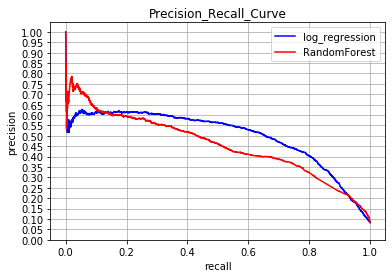

In [57]:
line1, = plt.plot(recall_log, precision_log, c='blue')
line2, = plt.plot(recall_RF, precision_RF, c='red')
plt.xlabel('recall')
plt.ylabel('precision')
plt.yticks([i / 20 for i in range(0, 21)])
plt.grid(b=True)
plt.legend((line1, line2), ('log_regression', 'RandomForest'))
plt.title('Precision_Recall_Curve')
print('AUC_log: ', auc(recall_log, precision_log))
print('AUC_RF: ', auc(recall_RF, precision_RF))

In [58]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test['label'], logistic.predict_proba(x_test)[:, 1])

In [59]:
fpr_RF, tpr_RF, thresholds_RF= roc_curve(y_test['label'], RF.predict_proba(x_test)[:, 1])

AUC_log:  0.9126906170578928
AUC_RF:  0.9005130243342809


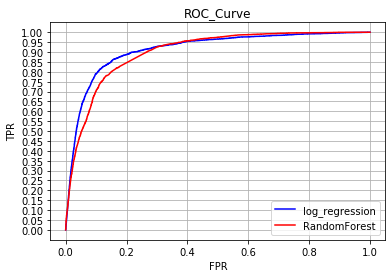

In [60]:
line1, = plt.plot(fpr_log, tpr_log, c='blue')
line2, = plt.plot(fpr_RF, tpr_RF, c='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.yticks([i / 20 for i in range(0, 21)])
plt.grid(b=True)
plt.legend((line1, line2), ('log_regression', 'RandomForest'))
plt.title('ROC_Curve')
print('AUC_log: ', auc(fpr_log, tpr_log))
print('AUC_RF: ', auc(fpr_RF, tpr_RF))

#### Резюме
* опять по обоим графикам видно, что RandomForest классифицирует хуже

In [183]:
vectorizer = CountVectorizer(stop_words='english', min_df = 0.0002)
data_title = vectorizer.fit_transform(x_train_initial['title'])
vocabulary_title = vectorizer.vocabulary_

In [184]:
data_title.shape[1]

3223

In [185]:
vectorizer = CountVectorizer(stop_words='english', min_df = 0.0003)
data_body = vectorizer.fit_transform(x_train_initial['body'])
vocabulary_body = vectorizer.vocabulary_

In [186]:
data_body.shape[1]

13067

In [187]:
data_body.__sizeof__()

32

In [188]:
x_train = sp.hstack([data_title, data_body])


In [189]:
vectorizer = CountVectorizer(vocabulary=vocabulary_title)
data_title = vectorizer.fit_transform(x_test_initial['title'])
vectorizer = CountVectorizer(vocabulary=vocabulary_body)
data_body = vectorizer.fit_transform(x_test_initial['body'])
x_test = sp.hstack([data_title, data_body])

In [190]:
logistic = LogisticRegression(C=3.73, max_iter=10000)
logistic.fit(x_train, y_train['label'])


LogisticRegression(C=3.73, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
fpr_log_top, tpr_log_top, thresholds_log_top = roc_curve(y_test['label'], logistic.predict_proba(x_test)[:, 1])

In [192]:
imp = RF.feature_importances_

In [193]:
arr = [(imp[i], i) for i in range(len(RF.feature_importances_))]

In [194]:
vocabulary_tree_title = []
vocabulary_tree_body = []

In [195]:
len(vocabulary)

592613

In [196]:
for ind in range(len(arr) - 1, len(arr) - 15001, -1):
    p = arr[ind]
    i = p[1]
    if (i < len_vocabulary_title):
        vocabulary_tree_title.append(vocabulary[i])
    else:
        vocabulary_tree_body.append(vocabulary[i])

In [197]:
len_vocabulary_title

32360

In [198]:
vocabulary_tree_body

['ｐゴシック',
 'ｎｋ',
 'ｍｓ',
 'ｌｉｖｅ',
 'ﬂoating',
 '확인하십시오',
 '화면으로',
 '형성',
 '현재',
 '헬스',
 '핵심인',
 '해줍니다',
 '해당',
 '해결해야',
 '해결할',
 '함수입니다',
 '한국어',
 '한국',
 '하차',
 '하는거',
 '하나요',
 '하나',
 '피하기',
 '프로그램',
 '표준오차',
 '폐기완료',
 '폐기예정',
 '페이지에서',
 '페이지',
 '파일명',
 '트루라는',
 '통신장애',
 '토탈',
 '토론의',
 '태블릿',
 '태그들을',
 '태권도',
 '타블렛',
 '키보드',
 '클릭이',
 '클릭되었으면',
 '클릭',
 '클래스',
 '코인에',
 '코드',
 '커뮤니티',
 '카테고리',
 '추정치',
 '추가시킬',
 '추가',
 '최소값',
 '최상단',
 '총알',
 '체크박스',
 '처방의명',
 '처방의료기관명',
 '찾았다는',
 '찾아서',
 '창업부서소개',
 '창업보육',
 '창업멘토단',
 '진행상황',
 '지폐',
 '지원',
 '중요한가요',
 '중요하다면',
 '주소',
 '종각',
 '정의',
 '접근',
 '전체',
 '전에',
 '저장소에서',
 '저장소가',
 '저장되지',
 '저장',
 '자체가',
 '있는지',
 '있나요',
 '입력했는데요',
 '입니다',
 '임시',
 '읽을',
 '일치하는',
 '일수',
 '인사말',
 '이전',
 '이미지를',
 '요가',
 '외부에서',
 '올바른',
 '오류가',
 '역번호',
 '역명',
 '여친에',
 '여보세요',
 '여기서',
 '에러가',
 '없습니다',
 '어떻게',
 '약제비',
 '암호화',
 '않습니다',
 '안되있으면',
 '안녕하세요',
 '실행된',
 '시청',
 '승차',
 '스타트업',
 '스크린샷',
 '수정',
 '수신기',
 '수량',
 '소개',
 '셀프',
 '성별',
 '설정',
 '선택해주세요',
 '서울역',
 '생년월일',
 '삭제',

In [199]:
vocabulary_tree_title

[]

### Комментарий 
Я не знаю почему, но ни одно слово из title не попала в первый 15000 важных

А еще я абсолютно беспонятия, что тут делают слова на корейском и главное почему они так важны, видимо что-то пошло не так как планировалось с RandomForest и он практически имеет нулевую информативность

In [200]:
vectorizer = CountVectorizer(stop_words='english', min_df = 0.002)
data_title = vectorizer.fit_transform(x_train_initial['title'])
vocabulary_title = vectorizer.vocabulary_

In [201]:
vectorizer = CountVectorizer(stop_words='english', vocabulary= vocabulary_tree_body)
data_body = vectorizer.fit_transform(x_train_initial['body'])
vocabulary_body = vectorizer.vocabulary_

In [202]:
x_train = sp.hstack([data_title, data_body])

In [204]:
vectorizer = CountVectorizer(vocabulary=vocabulary_title)
data_title = vectorizer.fit_transform(x_test_initial['title'])
vectorizer = CountVectorizer(vocabulary=vocabulary_body)
data_body = vectorizer.fit_transform(x_test_initial['body'])
x_test = sp.hstack([data_title, data_body])

In [206]:
logistic = LogisticRegression(C=3.73, max_iter=10000)
logistic.fit(x_train, y_train['label'])
fpr_log_RF, tpr_log_RF, thresholds_log_RF = roc_curve(y_test['label'], logistic.predict_proba(x_test)[:, 1])

In [207]:
vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
data_title = vectorizer.fit_transform(x_train_initial['title'])

In [208]:
vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
data_body = vectorizer.fit_transform(x_train_initial['body'])

In [209]:
x_train = data_title + data_body

In [210]:
vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
data_title = vectorizer.fit_transform(x_test_initial['title'])
vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
data_body = vectorizer.fit_transform(x_test_initial['body'])
x_test = data_title + data_body

In [211]:
logistic = LogisticRegression(C=3.73, max_iter=10000)
logistic.fit(x_train, y_train['label'])
fpr_log_hash, tpr_log_hash, thresholds_log_hash = roc_curve(y_test['label'], logistic.predict_proba(x_test)[:, 1])

AUC_log:  0.9126906170578928
AUC_log_top:  0.8921114651657788
AUC_log_RF:  0.8587378774766268
AUC_log_hash:  0.9437116566069474


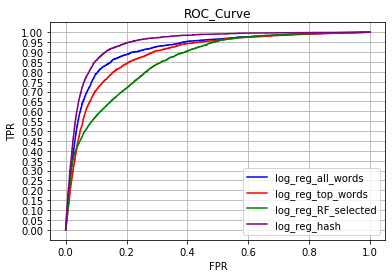

In [212]:
line1, = plt.plot(fpr_log, tpr_log, c='blue')
line2, = plt.plot(fpr_log_top, tpr_log_top, c='red')
line3, = plt.plot(fpr_log_RF, tpr_log_RF, c='green')
line4, = plt.plot(fpr_log_hash, tpr_log_hash, c='purple')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.yticks([i / 20 for i in range(0, 21)])
plt.grid(b=True)
plt.legend((line1, line2, line3, line4), ('log_reg_all_words', 'log_reg_top_words', 'log_reg_RF_selected', 'log_reg_hash'))
plt.title('ROC_Curve')
print('AUC_log: ', auc(fpr_log, tpr_log))
print('AUC_log_top: ', auc(fpr_log_top, tpr_log_top))
print('AUC_log_RF: ', auc(fpr_log_RF, tpr_log_RF))
print('AUC_log_hash: ', auc(fpr_log_hash, tpr_log_hash))